In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score, roc_auc_score, roc_curve)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('data/fifa_players_preprocessed.csv')
df.head()

,name,age,height_cm,weight_kg,nationality,club_name,league_name,overall,potential,value_eur,...,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium,age_group_21-25,age_group_26-30,age_group_31-35,age_group_36+
0,Pepe,37,188,81,Portugal,FC Porto,Portuguese Liga ZON SAGRES,81,81,3600000,...,False,False,False,True,False,False,False,False,False,True
1,B. Ivanović,36,185,91,Serbia,West Bromwich Albion,English Premier League,80,80,3000000,...,False,False,False,False,False,False,False,False,False,True
2,Quaresma,36,175,67,Portugal,Vitória Guimarães,Portuguese Liga ZON SAGRES,79,79,4200000,...,False,False,False,False,False,False,False,False,False,True
3,J. Mascherano,36,174,73,Argentina,Estudiantes de La Plata,Argentina Primera División,79,79,2700000,...,True,False,False,False,False,False,False,False,False,True
4,M. Parolo,35,184,75,Italy,Lazio,Italian Serie A,79,79,4000000,...,False,False,False,False,False,False,False,False,True,False


In [5]:
df.columns

Index(['name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club_name',
       'league_name', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'weak_foot', 'skill_moves', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'high_value',
       'height_weight_ratio', 'primary_position', 'primary_position_enc',
       'preferred_foot_Right', 'work_rate_High/Low', 'work_rate_High/Medium',
       'work_rate_Low/High', 'work_rate_Low/Low', 'work_rate_Low/Medium',
       'work_rate_Medium/High', 'work_rate_Medium/Low',
       'work_rate_Medium/Medium', 'age_group_21-25', 'age_group_26-30',
       'age_group_31-35', 'age_group_36+'],
      dtype='object')

In [6]:
df.shape

(14313, 37)

In [7]:
print(df.head())

            name  age  height_cm  weight_kg nationality  \
0           Pepe   37        188         81    Portugal   
1    B. Ivanović   36        185         91      Serbia   
2       Quaresma   36        175         67    Portugal   
3  J. Mascherano   36        174         73   Argentina   
4      M. Parolo   35        184         75       Italy   

                 club_name                 league_name  overall  potential  \
0                 FC Porto  Portuguese Liga ZON SAGRES       81         81   
1     West Bromwich Albion      English Premier League       80         80   
2        Vitória Guimarães  Portuguese Liga ZON SAGRES       79         79   
3  Estudiantes de La Plata  Argentina Primera División       79         79   
4                    Lazio             Italian Serie A       79         79   

   value_eur  ...  work_rate_Low/High work_rate_Low/Low  work_rate_Low/Medium  \
0    3600000  ...               False             False                 False   
1    3000000  

In [8]:
n_features = [
    'height_cm','weight_kg','weak_foot','skill_moves',
    'pace','shooting','passing','dribbling','defending','physic',
    'potential','height_weight_ratio','primary_position_enc'
]

In [9]:
c_features = [col for col in df.columns if col.startswith("work_rate_") or col.startswith("preferred_foot_") or col.startswith("age_group_")]

In [10]:
features = n_features + c_features
X = df[features]
y_reg = df["value_eur"]
y_clf = df["high_value"]
y_reg_log = np.log1p(y_reg)
scaler = StandardScaler()
X[n_features] = scaler.fit_transform(X[n_features])

C:\Users\user\AppData\Local\Temp\ipykernel_36284\2458719386.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[n_features] = scaler.fit_transform(X[n_features])


In [11]:
X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X, y_reg_log, y_clf, test_size=0.2, random_state=42
)

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_reg_train)

y_reg_pred = np.expm1(lin_reg.predict(X_test))

In [13]:
MAE = mean_absolute_error(np.expm1(y_reg_test), y_reg_pred)
MSE = mean_squared_error(np.expm1(y_reg_test), y_reg_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(np.expm1(y_reg_test), y_reg_pred)

print("Linear Regression Results:")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2:", R2)


Linear Regression Results:
MAE: 265937.08561040775
MSE: 222257288413.75296
RMSE: 471441.71263662376
R2: 0.727668960543327


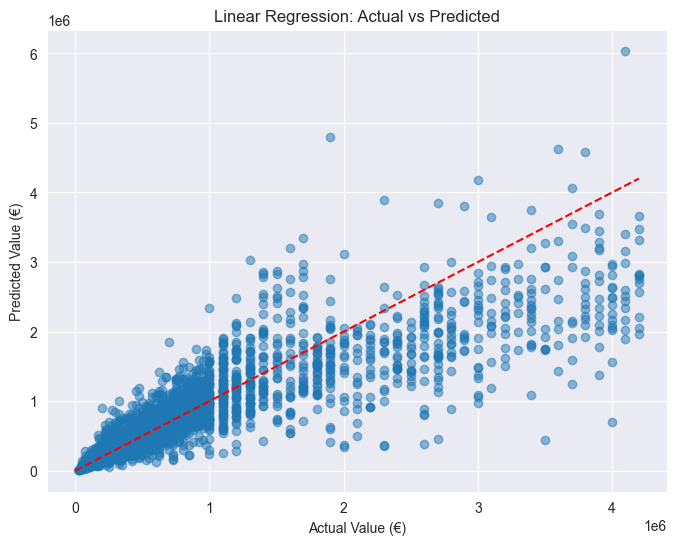

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(np.expm1(y_reg_test), y_reg_pred, alpha=0.5)
plt.plot([0, df['value_eur'].max()], [0, df['value_eur'].max()], '--', color='red')
plt.xlabel("Actual Value (€)")
plt.ylabel("Predicted Value (€)")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


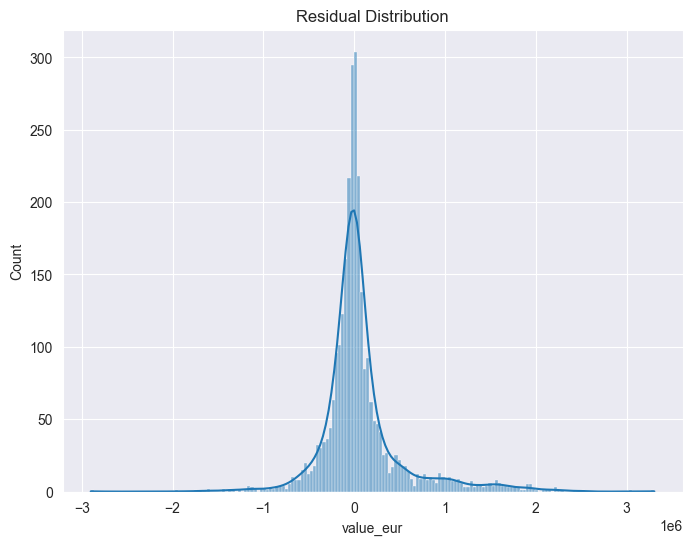

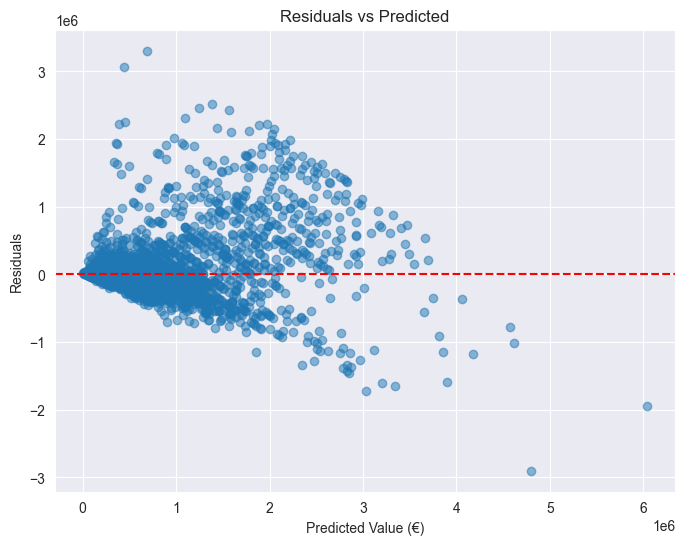

In [15]:
residuals = np.expm1(y_reg_test) - y_reg_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(y_reg_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Value (€)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


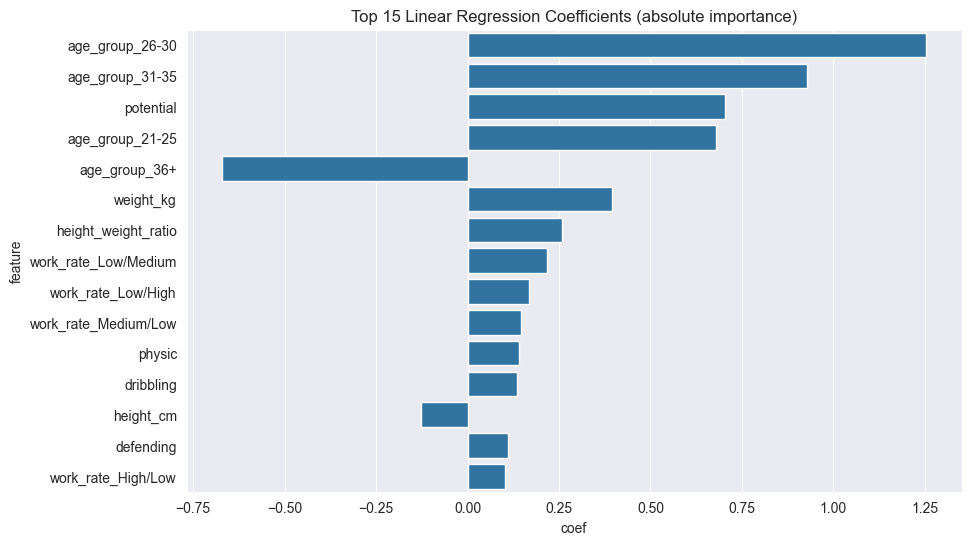

In [16]:
coeffs = pd.DataFrame({
    "feature": X.columns,
    "coef": lin_reg.coef_
}).sort_values("coef", key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=coeffs.head(15), x="coef", y="feature")
plt.title("Top 15 Linear Regression Coefficients (absolute importance)")
plt.show()


In [22]:
pd.set_option('display.float_format', '{:,.2f}'.format)
df_reg_pred = pd.DataFrame({
    "actual_value_eur": np.expm1(y_reg_test),
    "predicted_value_eur": y_reg_pred
})
df_reg_pred

,actual_value_eur,predicted_value_eur
5970,"650,000.00","583,569.76"
5440,"800,000.00","1,088,150.41"
2662,"1,400,000.00","1,220,507.27"
5140,"1,300,000.00","1,782,973.72"
7747,"525,000.00","346,002.40"
...,...,...
7153,"525,000.00","552,995.51"
6867,"275,000.00","328,023.86"
13360,"110,000.00","99,028.30"
8793,"400,000.00","519,164.78"


========================================================================

Logistic Regression Results:
Accuracy: 0.9042961928047503
Precision: 0.8902127659574468
Recall: 0.8782535684298909
F1 Score: 0.8841927303465765


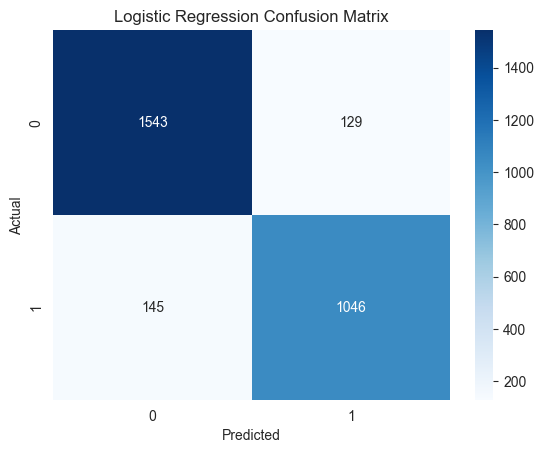

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_clf_train)

y_clf_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_clf_test, y_clf_pred)
precision = precision_score(y_clf_test, y_clf_pred)
recall = recall_score(y_clf_test, y_clf_pred)
f1 = f1_score(y_clf_test, y_clf_pred)

print("Logistic Regression Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

cm = confusion_matrix(y_clf_test, y_clf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


In [19]:
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coef": log_reg.coef_[0]
}).sort_values("coef", key=abs, ascending=False)

print(coef_df.head(15))


                 feature      coef
23       age_group_26-30  6.246442
24       age_group_31-35  4.129655
10             potential  3.834337
22       age_group_21-25  3.598157
25         age_group_36+  1.918582
1              weight_kg  1.599694
18  work_rate_Low/Medium  1.104223
11   height_weight_ratio  1.096790
9                 physic  0.952291
16    work_rate_Low/High  0.814236
7              dribbling  0.673187
0              height_cm -0.573149
14    work_rate_High/Low  0.500926
6                passing  0.496295
20  work_rate_Medium/Low  0.397750


In [24]:
df_clf_pred = pd.DataFrame({
    "actual_high_value": y_clf_test,
    "predicted_high_value": y_clf_pred,
    "predicted_prob": log_reg.predict_proba(X_test)[:,1]
})
df_clf_pred

,actual_high_value,predicted_high_value,predicted_prob
5970,0,0,0.23
5440,1,1,0.90
2662,1,1,0.95
5140,1,1,0.99
7747,0,0,0.02
...,...,...,...
7153,0,0,0.16
6867,0,0,0.01
13360,0,0,0.00
8793,0,0,0.09


In [20]:
import pickle

In [21]:
with open('models/model_linear', 'wb') as f:
    pickle.dump(lin_reg, f)
with open('models/model_logistic', 'wb') as f:
    pickle.dump(log_reg, f)